# Problem statment

the problem statment is about wether the health care is providing the any fraud service based on the customers of impatient and outpatient

In [ ]:
import pandas as pd 
import numpy as np

# Benficiary data

In [ ]:
df_b = pd.read_csv('/content/drive/MyDrive/Health Care/Train_Beneficiarydata.csv')

In [ ]:
df_b

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [ ]:
df_b.shape

(138556, 25)

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [ ]:
df_b['DOD'] = df_b.DOD.fillna(df_b.DOD.value_counts().index[0])

df_b['DOD'] = pd.to_datetime(df_b['DOD'], format = '%Y-%m-%d')
df_b['DOB'] = pd.to_datetime(df_b['DOB'], format = '%Y-%m-%d')
df_b['Age'] = ((df_b['DOD'] - df_b['DOB']).dt.days/365).astype('int64')

df_b = df_b.drop(columns = ['DOB', 'DOD'])

df_b.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1,1,0,39,230,12,12,1,2,...,1,1,2,1,1,36000,3204,60,70,66
1,BENE11002,2,1,0,39,280,12,12,2,2,...,2,2,2,2,2,0,0,30,50,73
2,BENE11003,1,1,0,52,590,12,12,1,2,...,2,1,2,2,2,0,0,90,40,73
3,BENE11004,1,1,0,39,270,12,12,1,1,...,1,1,1,1,2,0,0,1810,760,87
4,BENE11005,1,1,0,24,680,12,12,2,2,...,1,2,2,2,2,0,0,1790,1200,74


In [ ]:
df_b.RenalDiseaseIndicator.unique()

array(['0', 'Y'], dtype=object)

In [ ]:
df_b['RenalDiseaseIndicator'] = df_b['RenalDiseaseIndicator'].apply(lambda x: 1 if x=='Y' else 0)


In [ ]:
df_b.RenalDiseaseIndicator.unique()

array([0, 1])

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   Gender                           138556 non-null  int64 
 2   Race                             138556 non-null  int64 
 3   RenalDiseaseIndicator            138556 non-null  int64 
 4   State                            138556 non-null  int64 
 5   County                           138556 non-null  int64 
 6   NoOfMonths_PartACov              138556 non-null  int64 
 7   NoOfMonths_PartBCov              138556 non-null  int64 
 8   ChronicCond_Alzheimer            138556 non-null  int64 
 9   ChronicCond_Heartfailure         138556 non-null  int64 
 10  ChronicCond_KidneyDisease        138556 non-null  int64 
 11  ChronicCond_Cancer               138556 non-null  int64 
 12  ChronicCond_Obst

# Impatient data

In [ ]:
df_i = pd.read_csv('/content/drive/MyDrive/Health Care/Train_Inpatientdata.csv')

In [ ]:
df_i

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_i.shape

(40474, 30)

In [ ]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [ ]:
df_i.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [ ]:
df_i['OperatingPhysician'].fillna('None', inplace = True)
df_i['OtherPhysician'].fillna('None', inplace = True)

In [ ]:
df_i['ClaimStartDt'] = pd.to_datetime(df_i['ClaimStartDt'], format = '%Y-%m-%d')
df_i['ClaimEndDt'] = pd.to_datetime(df_i['ClaimEndDt'], format = '%Y-%m-%d')
df_i['ClaimDurationInDays'] = ((df_i['ClaimEndDt'] - df_i['ClaimStartDt']).dt.days).astype('int64')

df_i['AdmissionDt'] = pd.to_datetime(df_i['AdmissionDt'], format = '%Y-%m-%d')
df_i['DischargeDt'] = pd.to_datetime(df_i['DischargeDt'], format = '%Y-%m-%d')
df_i['AdmissionDurationInDays'] = ((df_i['DischargeDt'] - df_i['AdmissionDt']).dt.days).astype('int64')

df_i = df_i.drop(columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt'])

df_i.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,17


In [ ]:
df_i.drop(columns = ['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace= True)

for ClmProcedureCodeCount in range(4):
    df_i['ClmProcedureCode_{}'.format(ClmProcedureCodeCount + 1)].fillna(0, inplace = True)
    
for ClmDiagnosisCodeCount in range(10):
    df_i['ClmDiagnosisCode_{}'.format(ClmDiagnosisCodeCount + 1)].fillna('0', inplace = True)

In [ ]:
df_i.DeductibleAmtPaid.fillna(0, inplace = True)

In [ ]:
df_i.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))
df_i.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClaimDurationInDays,AdmissionDurationInDays
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,2724,19889,5849,0,0.0,0.0,0.0,0.0,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,0,0,0,0,7092.0,0.0,0.0,0.0,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,0,0,0,0,0.0,0.0,0.0,0.0,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,25062,40390,4019,0,331.0,0.0,0.0,0.0,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,5119,29620,20300,0,3893.0,0.0,0.0,0.0,17,17


# Outpatient Data

In [ ]:
df_o = pd.read_csv('/content/drive/MyDrive/Health Care/Train_Outpatientdata.csv')

In [ ]:
df_o

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
df_o.shape

(517737, 27)

In [ ]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [ ]:
df_o['OperatingPhysician'].fillna('None', inplace = True)
df_o['OtherPhysician'].fillna('None', inplace = True)

In [ ]:
df_o['ClaimStartDt'] = pd.to_datetime(df_o['ClaimStartDt'], format = '%Y-%m-%d')
df_o['ClaimEndDt'] = pd.to_datetime(df_o['ClaimEndDt'], format = '%Y-%m-%d')
df_o['ClaimDurationInDays'] = ((df_o['ClaimEndDt'] - df_o['ClaimStartDt']).dt.days).astype('int64')

df_o = df_o.drop(columns = ['ClaimStartDt', 'ClaimEndDt'])

df_o.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimDurationInDays
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,None,None,6115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,None,None,2723,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


In [ ]:
df_o.drop(columns = ['ClmProcedureCode_3' , 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace= True)

for ClmProcedureCodeCount in range(2):
    df_o['ClmProcedureCode_{}'.format(ClmProcedureCodeCount + 1)].fillna(0, inplace = True)
    
for ClmDiagnosisCodeCount in range(10):
    df_o['ClmDiagnosisCode_{}'.format(ClmDiagnosisCodeCount + 1)].fillna('0', inplace = True)

In [ ]:
df_o.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))
df_o.head()


,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimDurationInDays
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,...,0,0,0,0,0,0.0,0.0,0,56409,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,None,None,6115,0,0,...,0,0,0,0,0,0.0,0.0,0,79380,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,None,None,2723,0,0,...,0,0,0,0,0,0.0,0.0,0,V7612,0
3,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,0,0,...,0,0,0,0,0,0.0,0.0,0,V7612,0
4,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,...,V4577,0,0,0,0,0.0,0.0,0,71947,0


# Merging impateint data with benficiary data

In [ ]:
train_inPatientMerged = pd.merge(df_i, df_b, on = 'BeneID', how = 'inner')
train_inPatientMerged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,1,1,2,1,1,36000,3204,60,70,66
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,...,1,1,2,1,1,36000,3204,60,70,66
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,...,1,1,2,1,1,36000,3204,60,70,66
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,...,1,2,2,1,1,5000,1068,250,320,95
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,...,2,1,2,2,2,21260,2136,120,100,71


In [ ]:
train_inPatientMerged.shape

(40474, 49)

In [ ]:
train_inPatientMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           40474 non-null  object 
 1   ClaimID                          40474 non-null  object 
 2   Provider                         40474 non-null  object 
 3   InscClaimAmtReimbursed           40474 non-null  int64  
 4   AttendingPhysician               40474 non-null  object 
 5   OperatingPhysician               40474 non-null  object 
 6   OtherPhysician                   40474 non-null  object 
 7   ClmAdmitDiagnosisCode            40474 non-null  object 
 8   DeductibleAmtPaid                40474 non-null  float64
 9   DiagnosisGroupCode               40474 non-null  object 
 10  ClmDiagnosisCode_1               40474 non-null  object 
 11  ClmDiagnosisCode_2               40474 non-null  object 
 12  ClmDiagnosisCode_3

# Merging outpatient data with benficiary data

In [ ]:
train_outPatientMerged = pd.merge(df_o, df_b, on = 'BeneID', how = 'inner')
train_outPatientMerged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,...,2,2,2,2,2,0,0,30,50,73
1,BENE11003,CLM189947,PRV57610,80,PHY362868,None,None,6115,0,0,...,2,1,2,2,2,0,0,90,40,73
2,BENE11003,CLM438021,PRV57595,10,PHY328821,None,None,2723,0,0,...,2,1,2,2,2,0,0,90,40,73
3,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,0,0,...,1,1,1,1,2,0,0,1810,760,87
4,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,...,1,1,1,1,2,0,0,1810,760,87


In [ ]:
train_outPatientMerged.shape

(517737, 45)

In [ ]:
train_outPatientMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           517737 non-null  object 
 1   ClaimID                          517737 non-null  object 
 2   Provider                         517737 non-null  object 
 3   InscClaimAmtReimbursed           517737 non-null  int64  
 4   AttendingPhysician               517737 non-null  object 
 5   OperatingPhysician               517737 non-null  object 
 6   OtherPhysician                   517737 non-null  object 
 7   ClmDiagnosisCode_1               517737 non-null  object 
 8   ClmDiagnosisCode_2               517737 non-null  object 
 9   ClmDiagnosisCode_3               517737 non-null  object 
 10  ClmDiagnosisCode_4               517737 non-null  object 
 11  ClmDiagnosisCode_5               517737 non-null  object 
 12  Cl

# Provider Fraud data

In [ ]:
df_p = pd.read_csv('/content/drive/MyDrive/Health Care/Train.csv')

In [ ]:
df_p

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [ ]:
df_p.shape

(5410, 2)

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [ ]:
df_p['PotentialFraud'] = df_p['PotentialFraud'].apply(lambda x: 1 if x=='Yes' else 0)


In [ ]:
df_p.PotentialFraud.nunique

<bound method IndexOpsMixin.nunique of 0       0
1       1
2       0
3       1
4       0
       ..
5405    0
5406    0
5407    0
5408    0
5409    0
Name: PotentialFraud, Length: 5410, dtype: int64>

#Merging impatient data with povider fraud

In [ ]:
train_inPatientMergedWithProviderFraud_df = pd.merge(train_inPatientMerged, df_p, on = 'Provider', how = 'inner')
train_inPatientMergedWithProviderFraud_df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,...,1,2,1,1,36000,3204,60,70,66,1
1,BENE17521,CLM34721,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,987,...,1,2,2,2,19000,1068,100,20,96,1
2,BENE21718,CLM72336,PRV55912,17000,PHY334706,PHY334706,None,V5789,1068.0,941,...,1,1,2,2,17000,1068,1050,540,87,1
3,BENE22934,CLM73394,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,506,...,1,1,1,2,27000,2136,450,160,79,1
4,BENE24402,CLM32911,PRV55912,3000,PHY380413,PHY432598,None,1748,1068.0,593,...,1,2,2,2,3000,1068,8900,740,84,1


In [ ]:
train_inPatientMergedWithProviderFraud_df.shape

(40474, 50)

In [ ]:
train_inPatientMergedWithProviderFraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           40474 non-null  object 
 1   ClaimID                          40474 non-null  object 
 2   Provider                         40474 non-null  object 
 3   InscClaimAmtReimbursed           40474 non-null  int64  
 4   AttendingPhysician               40474 non-null  object 
 5   OperatingPhysician               40474 non-null  object 
 6   OtherPhysician                   40474 non-null  object 
 7   ClmAdmitDiagnosisCode            40474 non-null  object 
 8   DeductibleAmtPaid                40474 non-null  float64
 9   DiagnosisGroupCode               40474 non-null  object 
 10  ClmDiagnosisCode_1               40474 non-null  object 
 11  ClmDiagnosisCode_2               40474 non-null  object 
 12  ClmDiagnosisCode_3

In [ ]:
def label_encode(train_inPatientMergedWithProviderFraud_df):
    for col in train_inPatientMergedWithProviderFraud_df.columns:
        if train_inPatientMergedWithProviderFraud_df[col].dtype == 'object':
            unique_values = list(set(train_inPatientMergedWithProviderFraud_df[col]))
            label_map = {}
            for i in range(len(unique_values)):
                label_map[unique_values[i]] = i
            train_inPatientMergedWithProviderFraud_df[col] = [label_map[val] for val in train_inPatientMergedWithProviderFraud_df[col]]
    return train_inPatientMergedWithProviderFraud_df


In [ ]:
train_inPatientMergedWithProviderFraud_df = label_encode(train_inPatientMergedWithProviderFraud_df)


In [ ]:
label_encode(train_inPatientMergedWithProviderFraud_df).head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,21134,11943,1099,26000,6545,5103,1407,289,1068.0,137,...,1,2,1,1,36000,3204,60,70,66,1
1,28686,12945,1099,19000,3916,5732,2701,1765,1068.0,190,...,1,2,2,2,19000,1068,100,20,96,1
2,28274,13953,1099,17000,828,581,1407,905,1068.0,414,...,1,1,2,2,17000,1068,1050,540,87,1
3,4297,13857,1099,13000,9865,4003,2701,183,1068.0,324,...,1,1,1,2,27000,2136,450,160,79,1
4,18873,24074,1099,3000,5862,5493,1407,54,1068.0,408,...,1,2,2,2,3000,1068,8900,740,84,1


#Merging the Outpatient data with Provider data

In [ ]:
train_outPatientMergedWithProviderFraud_df = pd.merge(train_outPatientMerged, df_p, on = 'Provider', how = 'inner')
train_outPatientMergedWithProviderFraud_df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,...,2,2,2,2,0,0,30,50,73,1
1,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,0,0,...,1,1,1,2,0,0,1810,760,87,1
2,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,...,1,1,1,2,0,0,1810,760,87,1
3,BENE11004,CLM173224,PRV56011,20,PHY339887,None,None,20381,0,0,...,1,1,1,2,0,0,1810,760,87,1
4,BENE11004,CLM224741,PRV56011,40,PHY345721,None,None,V6546,4280,2449,...,1,1,1,2,0,0,1810,760,87,1


In [ ]:
train_outPatientMergedWithProviderFraud_df.shape

(517737, 46)

In [ ]:
train_outPatientMergedWithProviderFraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           517737 non-null  object 
 1   ClaimID                          517737 non-null  object 
 2   Provider                         517737 non-null  object 
 3   InscClaimAmtReimbursed           517737 non-null  int64  
 4   AttendingPhysician               517737 non-null  object 
 5   OperatingPhysician               517737 non-null  object 
 6   OtherPhysician                   517737 non-null  object 
 7   ClmDiagnosisCode_1               517737 non-null  object 
 8   ClmDiagnosisCode_2               517737 non-null  object 
 9   ClmDiagnosisCode_3               517737 non-null  object 
 10  ClmDiagnosisCode_4               517737 non-null  object 
 11  ClmDiagnosisCode_5               517737 non-null  object 
 12  Cl

In [ ]:
def label_encode(train_outPatientMergedWithProviderFraud_df):
    for col in train_outPatientMergedWithProviderFraud_df.columns:
        if train_outPatientMergedWithProviderFraud_df[col].dtype == 'object':
            unique_values = list(set(train_outPatientMergedWithProviderFraud_df[col]))
            label_map = {}
            for i in range(len(unique_values)):
                label_map[unique_values[i]] = i
            train_outPatientMergedWithProviderFraud_df[col] = [label_map[val] for val in train_outPatientMergedWithProviderFraud_df[col]]
    return train_outPatientMergedWithProviderFraud_df

In [ ]:
train_outPatientMergedWithProviderFraud_df = label_encode(train_outPatientMergedWithProviderFraud_df)


In [ ]:
label_encode(train_outPatientMergedWithProviderFraud_df).head()


,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,2982,406588,2356,30,15127,18799,29163,5948,678,3619,...,2,2,2,2,0,0,30,50,73,1
1,22017,321436,2356,40,20517,18799,29163,2100,4243,1565,...,1,1,1,2,0,0,1810,760,87,1
2,22017,420987,2356,200,34670,18799,29163,1934,3148,3103,...,1,1,1,2,0,0,1810,760,87,1
3,22017,35081,2356,20,55194,18799,29163,1375,4243,1565,...,1,1,1,2,0,0,1810,760,87,1
4,22017,428021,2356,40,31610,18799,29163,1170,3353,982,...,1,1,1,2,0,0,1810,760,87,1


In [ ]:
train_inPatientMergedWithProviderFraud_df = train_inPatientMergedWithProviderFraud_df.drop(columns = ['BeneID', 'ClaimID', 'Provider'])
train_outPatientMergedWithProviderFraud_df = train_outPatientMergedWithProviderFraud_df.drop(columns = ['BeneID', 'ClaimID', 'Provider'])
print(train_inPatientMergedWithProviderFraud_df.shape, train_outPatientMergedWithProviderFraud_df.shape)


(40474, 47) (517737, 43)


In [ ]:
train_inPatientMergedWithProviderFraud_df.corr()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
InscClaimAmtReimbursed,1.000000,0.001348,-0.064678,0.011321,0.035373,-0.026377,0.002563,0.058546,-0.016492,-0.025179,...,-0.025341,0.015055,0.008068,-0.009870,0.610995,0.037201,0.084048,0.048050,0.001334,0.025308
AttendingPhysician,0.001348,1.000000,0.222490,0.011542,-0.006836,-0.002499,0.000286,-0.000988,-0.001072,-0.001528,...,-0.003870,0.004882,0.009237,0.007948,0.004712,0.003024,0.005989,0.009460,0.000361,-0.051324
OperatingPhysician,-0.064678,0.222490,1.000000,0.015342,-0.018002,-0.002493,-0.005038,-0.019270,0.000437,-0.001662,...,0.003571,-0.004446,-0.004662,-0.013756,-0.036068,0.002461,-0.041248,-0.038034,-0.006007,-0.000451
OtherPhysician,0.011321,0.011542,0.015342,1.000000,-0.009641,0.003943,0.001455,0.003099,0.002050,-0.005753,...,-0.000204,-0.004663,-0.004247,-0.005883,0.009907,0.006405,-0.003408,-0.005955,-0.001714,-0.011671
ClmAdmitDiagnosisCode,0.035373,-0.006836,-0.018002,-0.009641,1.000000,0.000303,-0.006774,0.228269,0.004641,-0.016416,...,-0.018738,0.000058,-0.007469,0.046846,0.019283,-0.004682,0.004157,0.003890,0.002616,0.000746
DeductibleAmtPaid,-0.026377,-0.002499,-0.002493,0.003943,0.000303,1.000000,0.002078,-0.004355,-0.000325,0.003475,...,0.037718,0.002089,0.009792,0.023805,-0.142385,-0.016922,-0.032377,-0.027750,-0.002099,0.004006
DiagnosisGroupCode,0.002563,0.000286,-0.005038,0.001455,-0.006774,0.002078,1.000000,-0.011028,0.000485,-0.002663,...,0.003434,0.006891,0.008826,-0.028591,0.006851,0.009739,-0.001724,-0.004637,0.005644,0.004528
ClmDiagnosisCode_1,0.058546,-0.000988,-0.019270,0.003099,0.228269,-0.004355,-0.011028,1.000000,-0.005027,-0.014457,...,-0.015033,-0.001727,-0.014611,0.056167,0.032870,0.001725,0.004193,0.000094,-0.002130,0.008492
ClmDiagnosisCode_2,-0.016492,-0.001072,0.000437,0.002050,0.004641,-0.000325,0.000485,-0.005027,1.000000,-0.007490,...,-0.005521,0.008405,-0.006000,-0.004642,-0.019364,-0.012391,-0.008257,-0.009112,-0.003754,0.000997
ClmDiagnosisCode_3,-0.025179,-0.001528,-0.001662,-0.005753,-0.016416,0.003475,-0.002663,-0.014457,-0.007490,1.000000,...,-0.011284,0.014531,-0.006607,0.004925,-0.017523,-0.002858,-0.007601,-0.006025,0.000416,-0.004286


<Axes: >

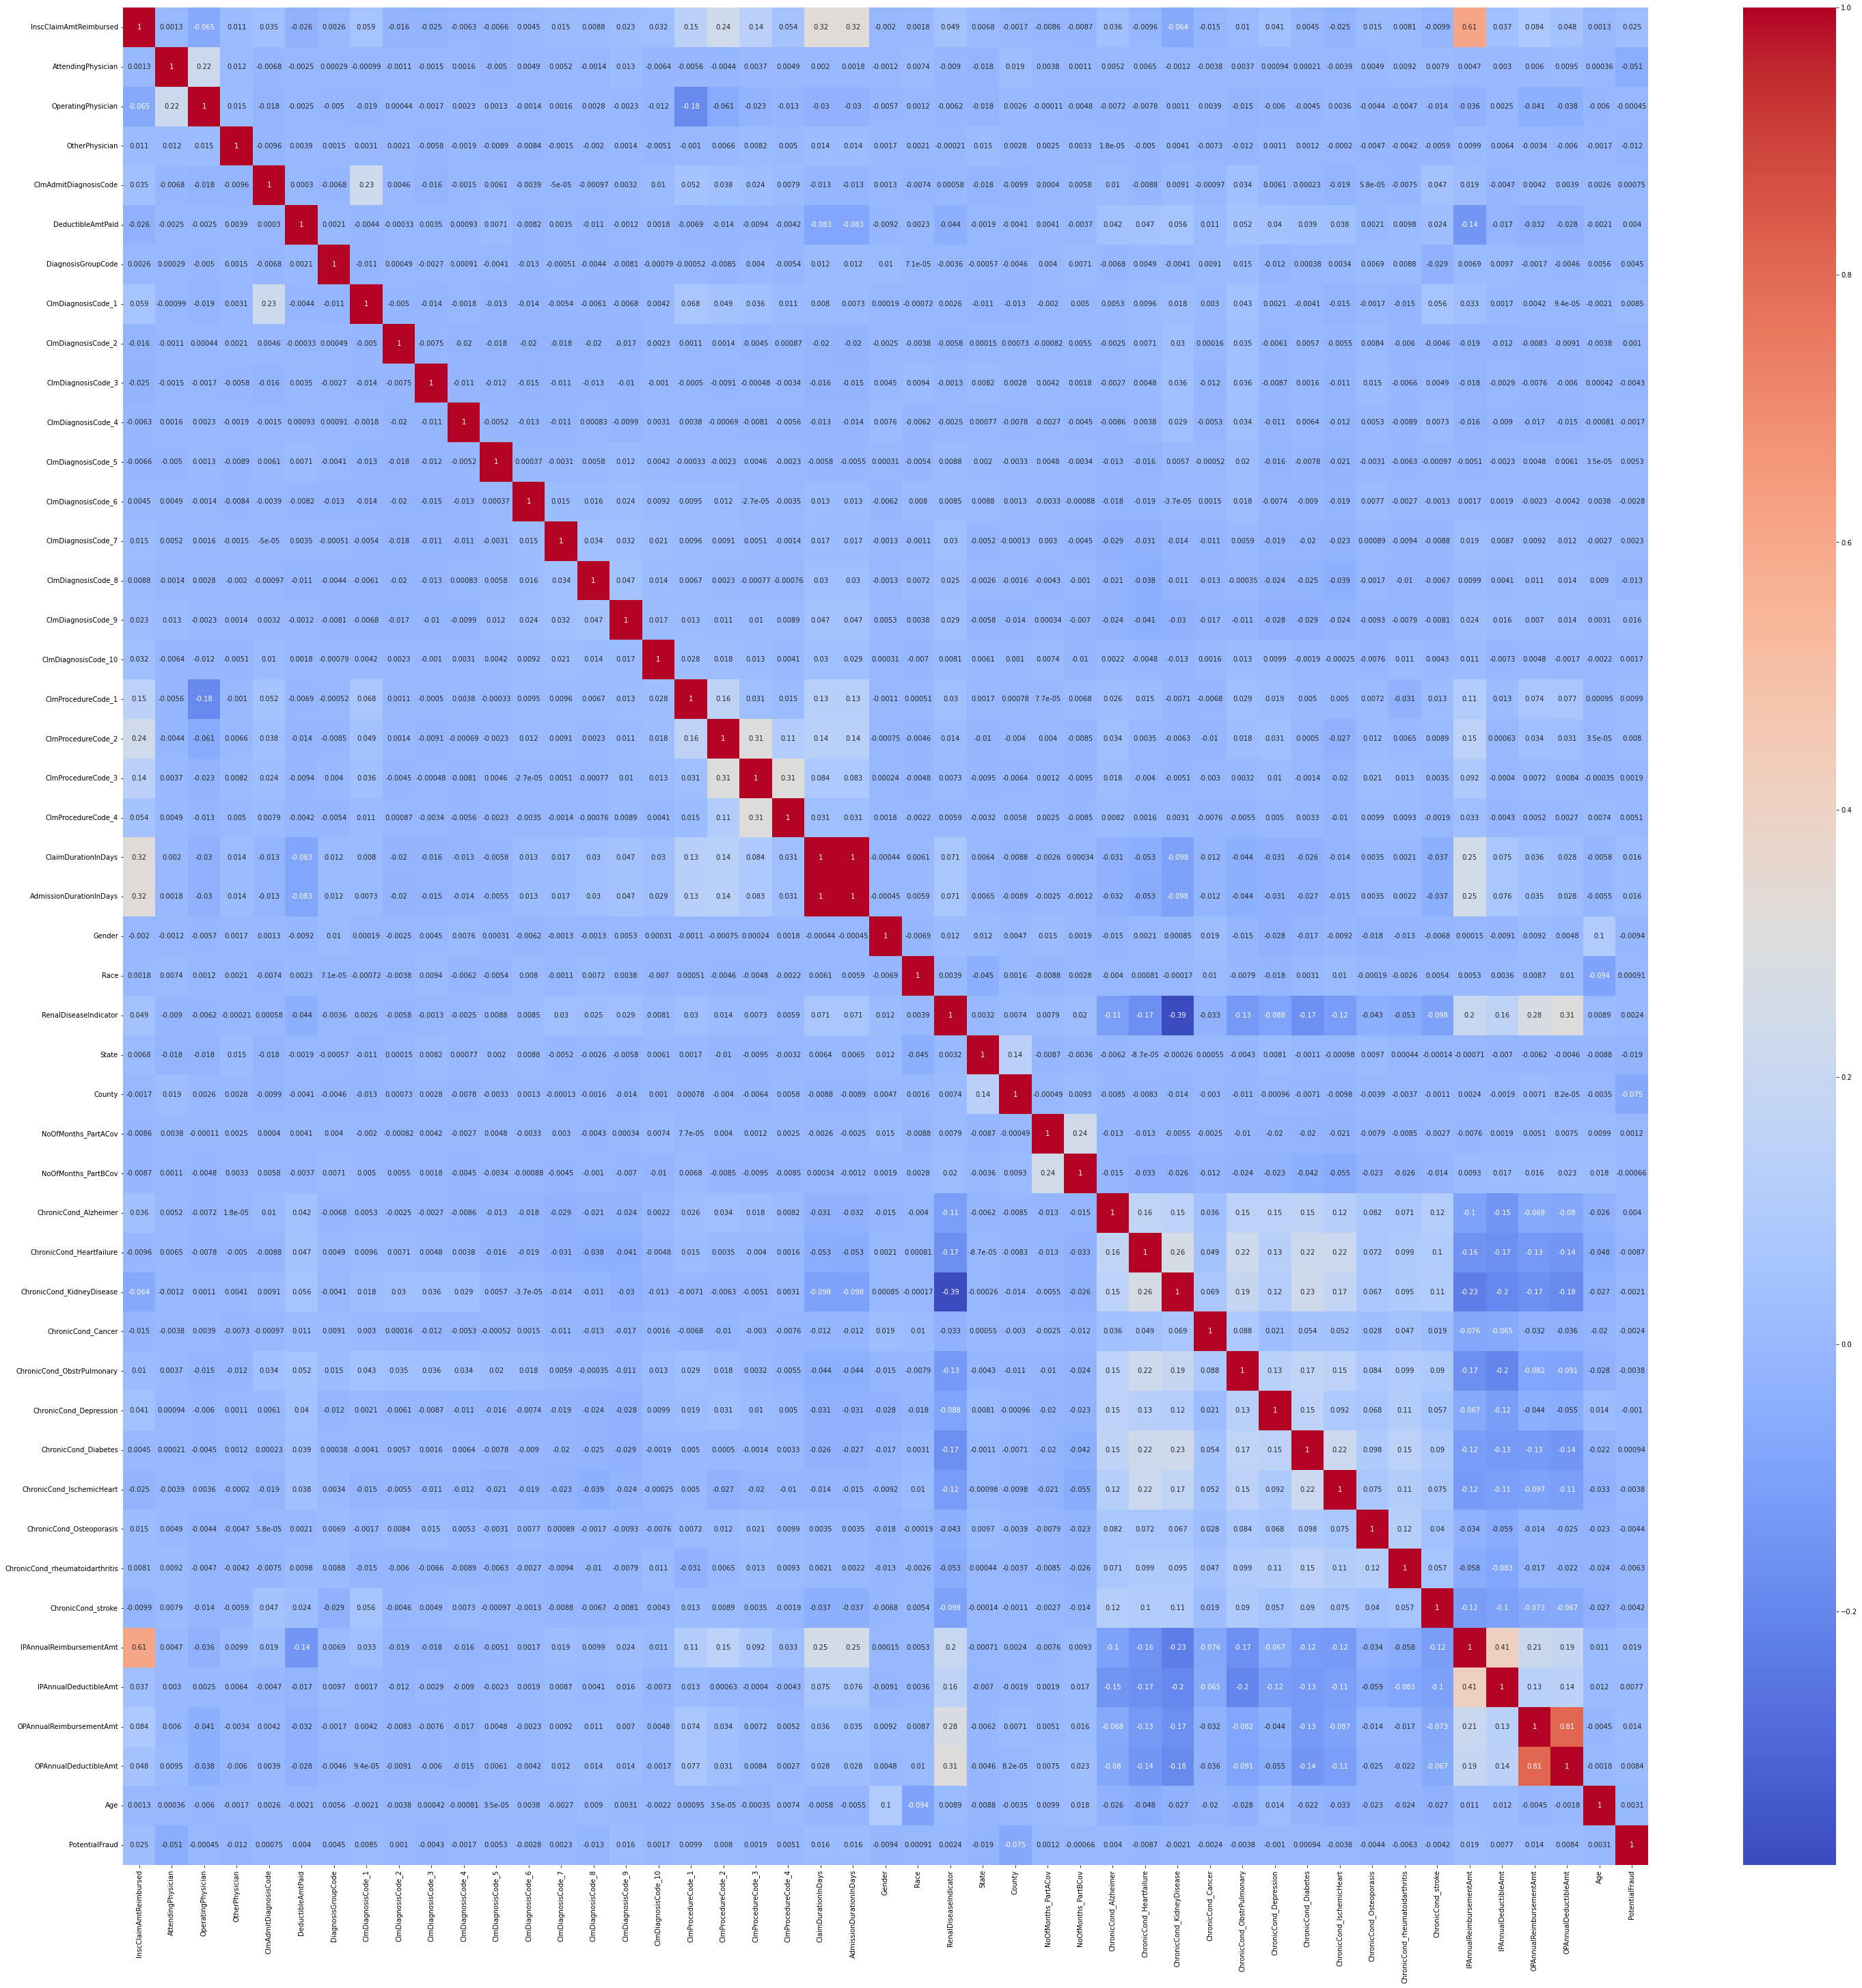

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
c= train_inPatientMergedWithProviderFraud_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

array([[<Axes: title={'center': 'InscClaimAmtReimbursed'}>,
        <Axes: title={'center': 'AttendingPhysician'}>,
        <Axes: title={'center': 'OperatingPhysician'}>,
        <Axes: title={'center': 'OtherPhysician'}>,
        <Axes: title={'center': 'ClmAdmitDiagnosisCode'}>,
        <Axes: title={'center': 'DeductibleAmtPaid'}>,
        <Axes: title={'center': 'DiagnosisGroupCode'}>],
       [<Axes: title={'center': 'ClmDiagnosisCode_1'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_2'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_3'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_4'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_5'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_6'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_7'}>],
       [<Axes: title={'center': 'ClmDiagnosisCode_8'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_9'}>,
        <Axes: title={'center': 'ClmDiagnosisCode_10'}>,
        <Axes: title={'center': 'ClmProcedu

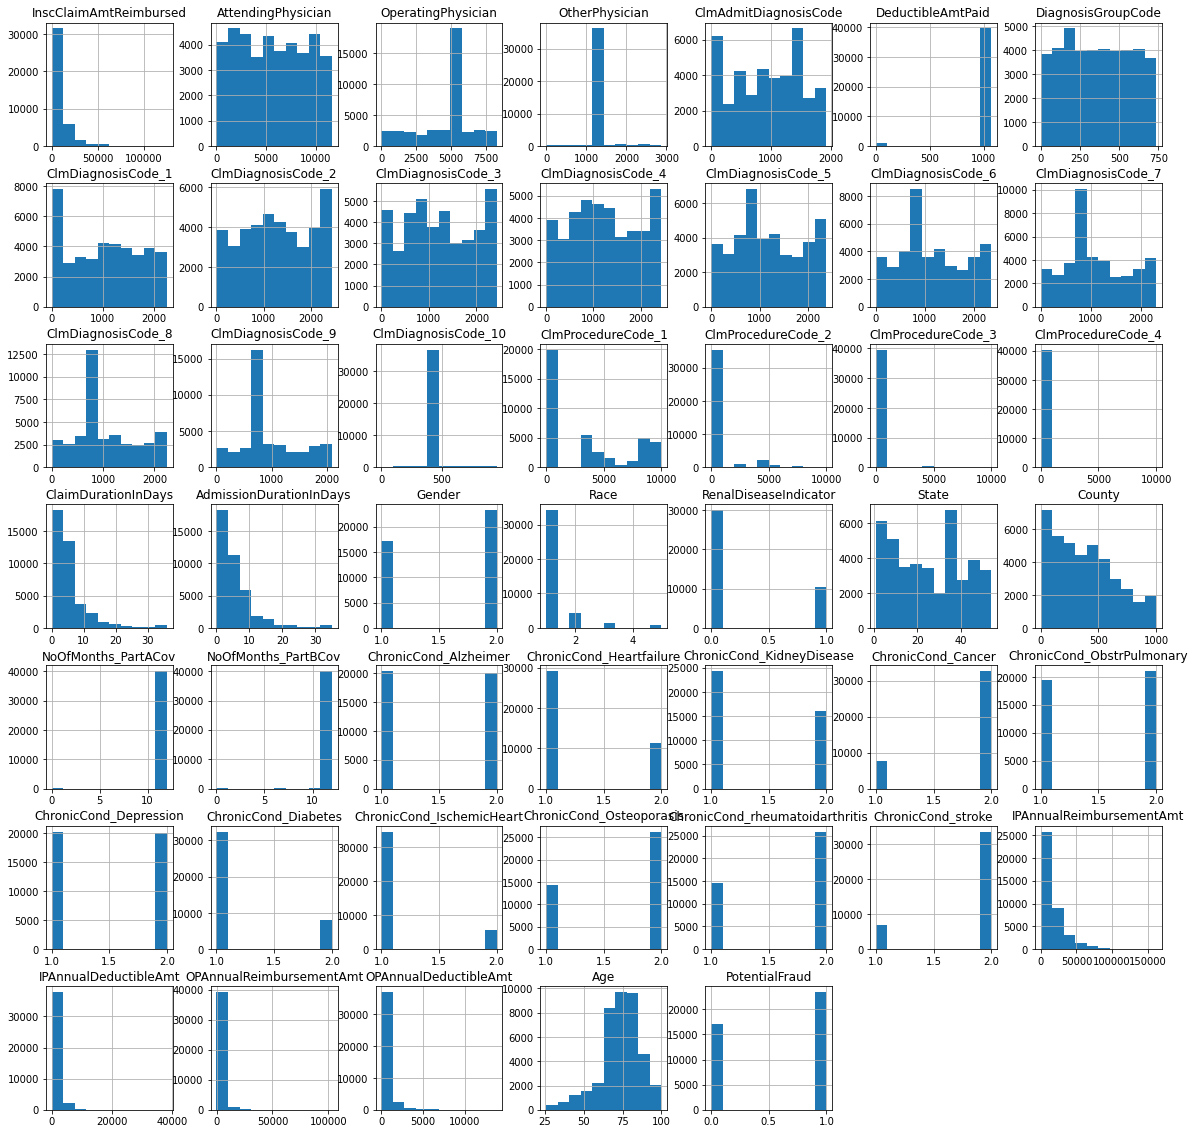

In [ ]:
train_inPatientMergedWithProviderFraud_df.hist(figsize=(20,20))

# Modeling with impatient data

In [ ]:
train_outPatientMergedWithProviderFraud_df

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,30,15127,18799,29163,5948,678,3619,1396,1209,1065,...,2,2,2,2,0,0,30,50,73,1
1,40,20517,18799,29163,2100,4243,1565,1396,1209,1065,...,1,1,1,2,0,0,1810,760,87,1
2,200,34670,18799,29163,1934,3148,3103,2612,2458,333,...,1,1,1,2,0,0,1810,760,87,1
3,20,55194,18799,29163,1375,4243,1565,1396,1209,1065,...,1,1,1,2,0,0,1810,760,87,1
4,40,31610,18799,29163,1170,3353,982,1926,1209,1065,...,1,1,1,2,0,0,1810,760,87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,3300,32518,12435,29163,3643,4243,1565,1396,1209,1065,...,1,2,1,2,0,0,4400,220,82,0
517733,1900,60786,18799,29163,7055,4243,1565,1396,1209,1065,...,1,2,2,2,15000,1068,2540,400,67,0
517734,2100,15284,18799,29163,6027,2832,1565,1396,1209,1065,...,1,2,2,2,0,0,14240,2810,63,0
517735,10,50030,18799,29163,3929,4243,1565,1396,1209,1065,...,1,1,1,2,0,0,640,350,85,0


In [ ]:
# Shuffle your dataset 
shuffle_df = train_outPatientMergedWithProviderFraud_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(train_outPatientMergedWithProviderFraud_df))



# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [ ]:
train_set

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
372096,80,26104,18799,39941,8958,1212,3444,1004,1209,1065,...,1,2,1,2,0,0,100,0,87,0
51905,20,71359,18799,42694,6339,4243,1565,1396,1209,1065,...,1,2,1,2,0,0,170,130,80,0
296546,60,11462,18799,29163,7757,530,2530,2909,260,1065,...,1,2,2,2,0,0,760,100,82,0
330323,0,19299,18799,29163,484,1212,14,1004,123,2346,...,2,1,2,2,0,0,7020,460,57,1
26260,200,47835,18450,25180,31,1520,4347,934,1722,2247,...,1,2,2,2,0,0,2560,490,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131219,70,18114,18799,29163,4117,4216,3173,3804,1209,1065,...,1,2,2,2,0,0,450,440,71,1
252714,600,2195,18799,29163,966,4246,3911,3708,1209,1065,...,1,1,2,2,27000,2136,1840,410,86,1
125329,100,11101,18799,29163,7248,4243,1565,1396,1209,1065,...,1,1,2,2,8000,1068,4810,790,71,0
439639,400,66855,25782,29163,3939,1937,1836,1658,1209,1065,...,1,2,1,2,0,0,1340,440,57,0


In [ ]:
test_set

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
304209,800,41972,18799,29163,388,4163,1565,1396,1209,1065,...,1,2,2,2,7000,1068,2050,460,80,0
87276,40,48420,18799,29163,220,4243,1565,1396,1209,1065,...,1,2,1,2,0,0,3500,610,68,1
447080,100,17476,18799,29163,4222,4243,1565,1396,1209,1065,...,1,1,1,2,13000,2136,570,240,34,0
256729,60,27427,18799,29163,1222,4243,1565,1396,1209,1065,...,1,1,2,2,9000,1068,280,1300,66,1
142889,600,2110,18799,29163,9941,3682,1565,1396,1209,1065,...,1,1,2,2,16540,2136,1320,200,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139876,400,50651,25098,9766,4287,2390,1904,1396,1209,1065,...,1,2,2,2,0,0,4990,690,84,1
351863,300,25884,18799,29163,8724,3574,1565,1396,1209,1065,...,1,1,2,2,50000,2136,5240,1460,84,0
41954,700,73910,18799,11314,3003,4243,1565,1396,1209,1065,...,2,2,2,2,0,0,1000,250,71,0
94533,100,21570,16883,29163,3758,4243,1565,1396,1209,1065,...,1,1,2,2,29000,4272,1630,360,82,1


In [ ]:
import random
np.random.seed(42)
class NeuralNetwork:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
      #activation function  
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
      # Forward Propogtion
    def forward(self, X):
      
        # Calculate hidden layer activation
        
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Calculate output layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
        #Backward Propogation
    def backward(self, X, y, output):
        # Calculate error at output layer
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        # Calculate error at hidden layer
        self.hidden_error = np.dot(self.output_delta, self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 += self.learning_rate * np.dot(self.a1.T, self.output_delta)
        self.b2 += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.W1 += self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.b1 += self.learning_rate * np.sum(self.hidden_delta, axis=0)
    
    def train(self, X, y, epochs):
            output = self.forward(X)
            self.backward(X, y, output)
               
    def predict(self, X):
        return np.round(self.forward(X))
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Define training and testing sets
train_set = np.random.randn(100, 43)
test_set = np.random.randint(0, 2, size=(100, 1))


# Create a neural network with 5 inputs, 10 hidden units, and 1 output
nn = NeuralNetwork(input_size=43, hidden_size=10, output_size=1)

# Train the neural network on the training set for 10 epochs
nn.train(train_set, test_set, epochs=10)

# Evaluate the accuracy of the trained model on the testing set
accuracy = nn.evaluate(train_set, test_set)
print("Testing accuracy:", accuracy)



Testing accuracy: 0.51


In [ ]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense



# Split the data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(
    train_outPatientMergedWithProviderFraud_df.drop(columns=["PotentialFraud"]), train_outPatientMergedWithProviderFraud_df["PotentialFraud"], test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(43, input_dim=train_data.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_data, train_target, epochs=10, batch_size=10, verbose=0)

# Evaluate the model's accuracy on the train data
train_loss, train_accuracy = model.evaluate(train_data, train_target, verbose=0)
print("Train Accuracy:", train_accuracy)

# Evaluate the model's accuracy on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_target, verbose=0)
print("Test Accuracy:", test_accuracy)



Train Accuracy: 0.6344205141067505
Test Accuracy: 0.6332715153694153
